In [1]:
import numpy as np
import pandas as pd
import matplotlib 
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train1=pd.read_csv('Admission_Predict.csv')
train2=pd.read_csv('Admission_Predict_Ver1.1.csv')
train=train1.append(train2, ignore_index=True)

In [3]:
print(train.head(30))

    Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0            1        337          118                  4  4.5   4.5  9.65   
1            2        324          107                  4  4.0   4.5  8.87   
2            3        316          104                  3  3.0   3.5  8.00   
3            4        322          110                  3  3.5   2.5  8.67   
4            5        314          103                  2  2.0   3.0  8.21   
5            6        330          115                  5  4.5   3.0  9.34   
6            7        321          109                  3  3.0   4.0  8.20   
7            8        308          101                  2  3.0   4.0  7.90   
8            9        302          102                  1  2.0   1.5  8.00   
9           10        323          108                  3  3.5   3.0  8.60   
10          11        325          106                  3  3.5   4.0  8.40   
11          12        327          111                  4  4.0  

In [4]:
train.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,228.277778,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,134.674991,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,113.000000,308.000000,103.000000,2.000000,2.500000,3.00000,8.140000,0.000000,0.640000
50%,225.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,338.000000,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
Serial No.           900 non-null int64
GRE Score            900 non-null int64
TOEFL Score          900 non-null int64
University Rating    900 non-null int64
SOP                  900 non-null float64
LOR                  900 non-null float64
CGPA                 900 non-null float64
Research             900 non-null int64
Chance of Admit      900 non-null float64
dtypes: float64(4), int64(5)
memory usage: 63.4 KB


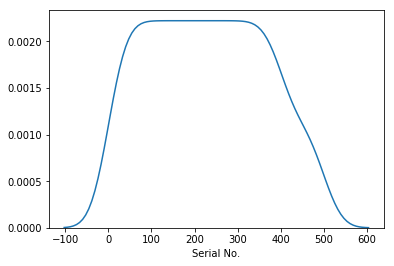

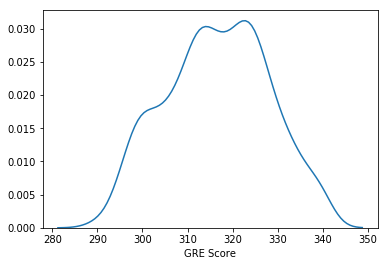

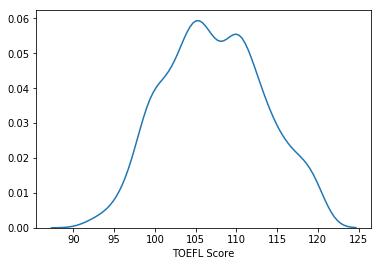

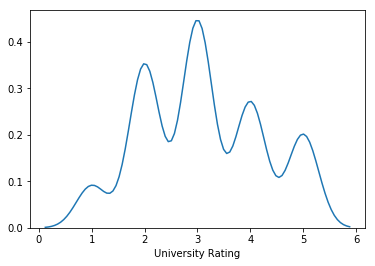

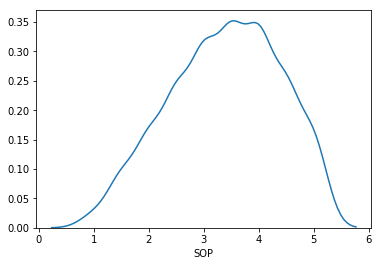

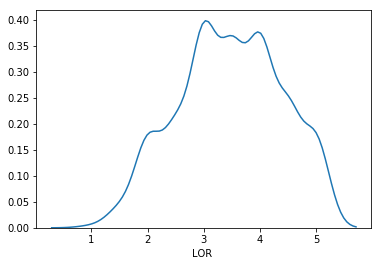

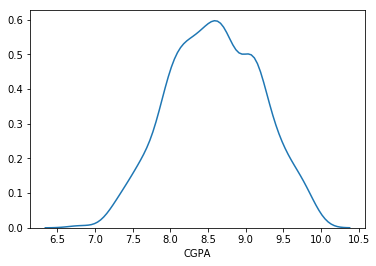

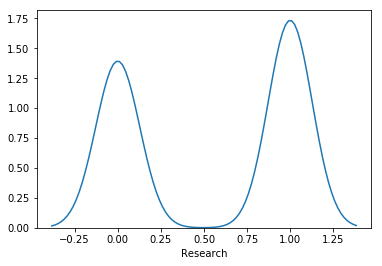

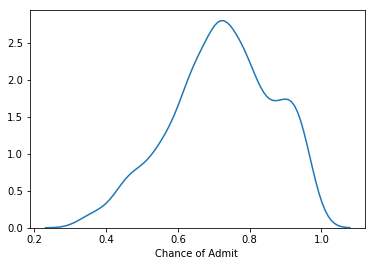

In [6]:
for column in train.columns:
    plt.figure()
    sns.distplot(train[column],hist=False)
    plt.show()

In [7]:
train.drop(['Serial No.'],axis=1,inplace=True)

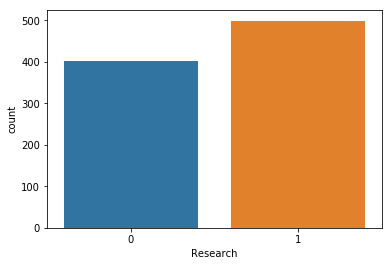

In [8]:
plt.figure()
sns.countplot(train['Research'])
plt.show()

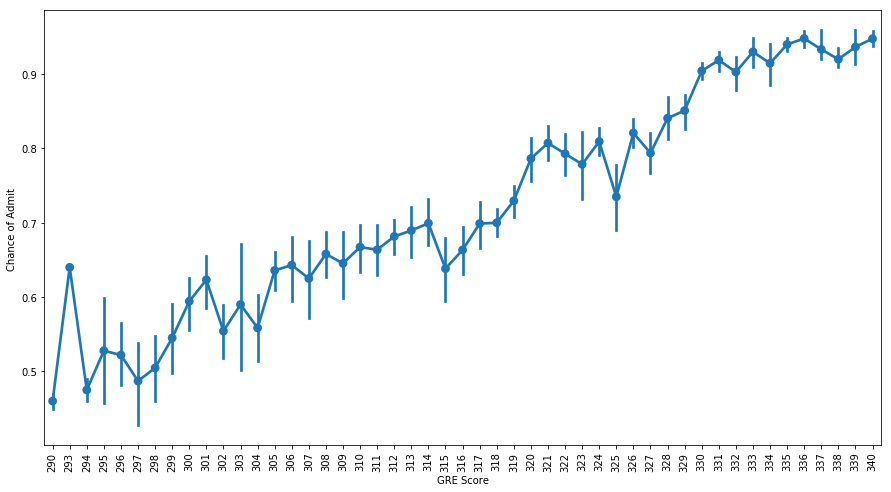

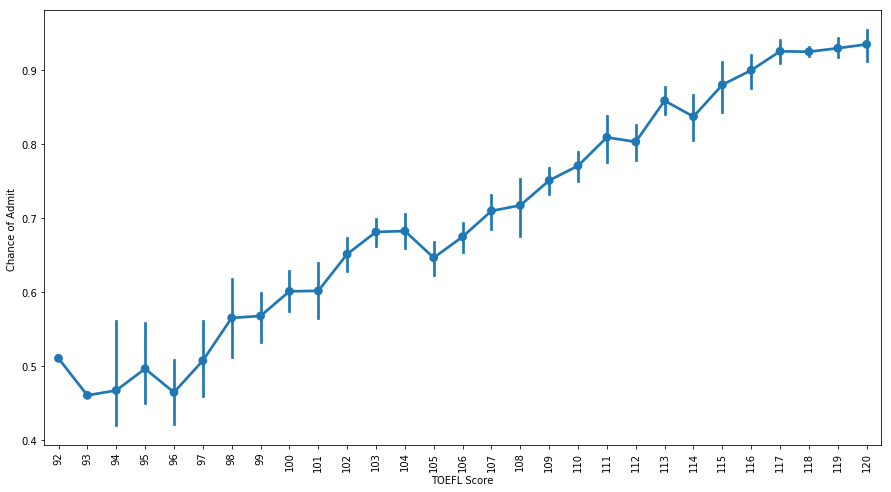

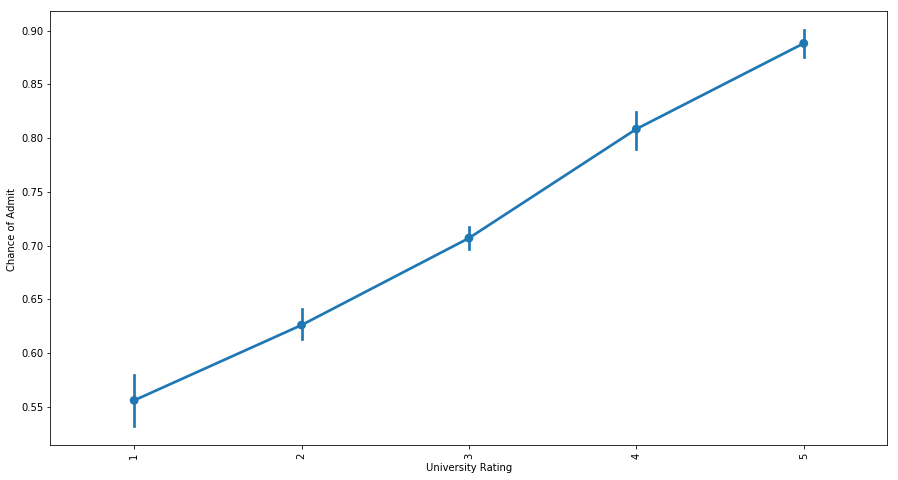

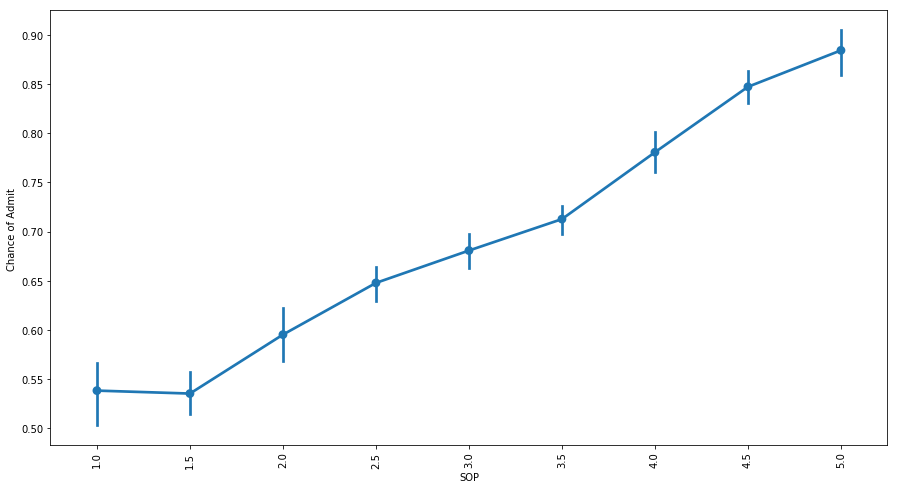

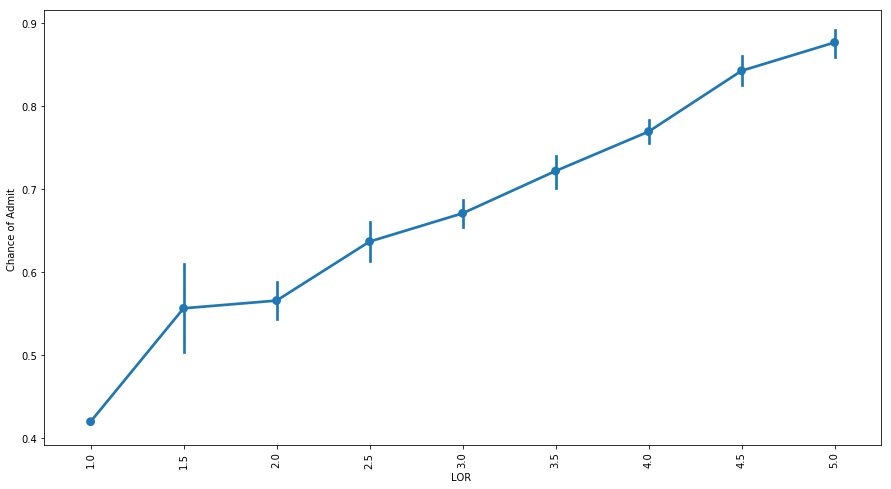

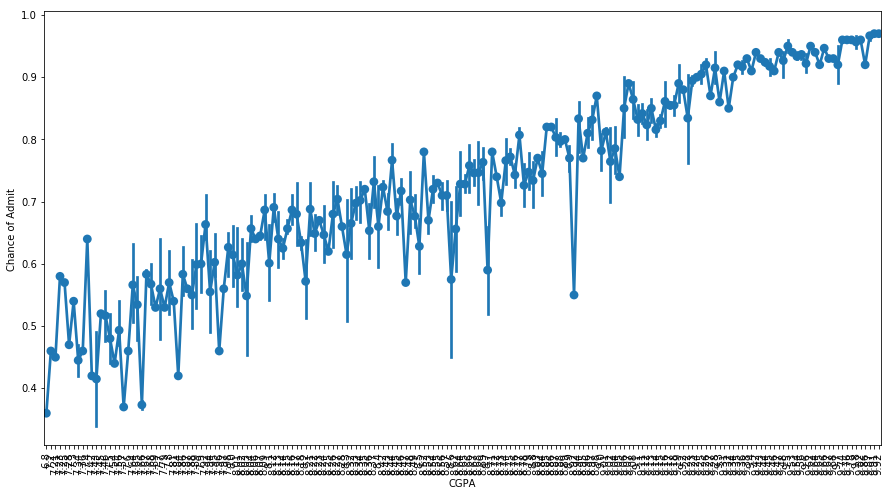

In [9]:
for column in ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA']:
    plt.figure(figsize=(15,8))
    sns.pointplot(x=column,y='Chance of Admit ',data=train)
    plt.xticks(rotation=90)
    plt.show()

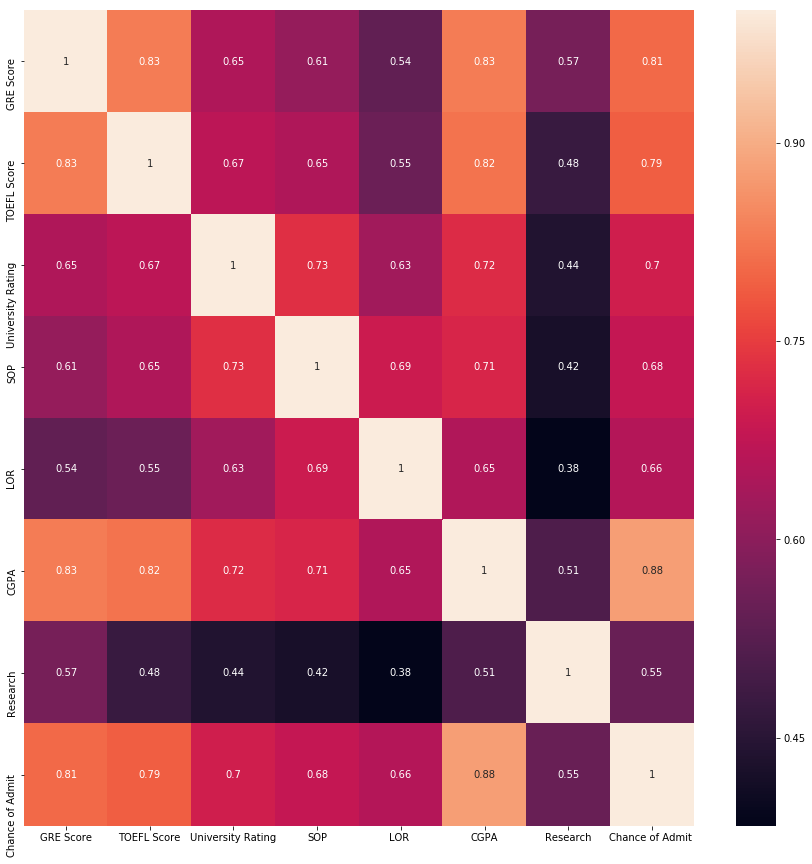

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [11]:
X=train[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','Research']]
Y=train['Chance of Admit ']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


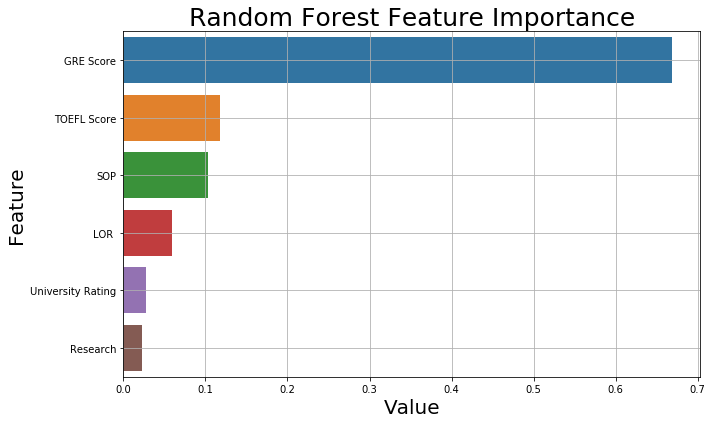

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.xlabel('Value',fontsize=20)
plt.ylabel('Feature',fontsize=20)
plt.title('Random Forest Feature Importance',fontsize=25)
plt.grid()
plt.ioff()
plt.tight_layout()

In [14]:
print(rf_model.score(x_test,y_test))

0.9190351910148646


In [15]:
from sklearn.linear_model import Lasso

In [16]:
score=[]
c=[1e+4,1e+3,1e+2,1e+1,0,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9]
for i in c:
    regressor=Lasso(alpha=i,max_iter=1000)
    regressor.fit(x_train,y_train)
    print('Coeffs for  : '+str(i)+' '+str(regressor.coef_))
    print('Score for   : '+str(i)+' '+str(regressor.score(x_test,y_test)))
    score.append(regressor.score(x_test,y_test))

Coeffs for  : 10000.0 [0. 0. 0. 0. 0. 0.]
Score for   : 10000.0 -0.0007845484641346712
Coeffs for  : 1000.0 [0. 0. 0. 0. 0. 0.]
Score for   : 1000.0 -0.0007845484641346712
Coeffs for  : 100.0 [0. 0. 0. 0. 0. 0.]
Score for   : 100.0 -0.0007845484641346712
Coeffs for  : 10.0 [0. 0. 0. 0. 0. 0.]
Score for   : 10.0 -0.0007845484641346712
Coeffs for  : 0 [0.00415063 0.00518449 0.01415215 0.01022646 0.03147728 0.02590008]
Score for   : 0 0.7293777275516613
Coeffs for  : 0.1 [0.00734028 0.00411437 0.         0.         0.         0.        ]
Score for   : 0.1 0.6759073503245081
Coeffs for  : 0.01 [0.00538525 0.00626263 0.00860668 0.00304481 0.02247941 0.        ]
Score for   : 0.01 0.7294743602470993
Coeffs for  : 0.001 [0.00434382 0.00526617 0.01365159 0.0096184  0.03070512 0.02040099]
Score for   : 0.001 0.7305768167350697
Coeffs for  : 0.0001 [0.00417016 0.00519217 0.01410228 0.01016665 0.0314001  0.02534915]
Score for   : 0.0001 0.7295268813201856
Coeffs for  : 1e-05 [0.00415268 0.0051851

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


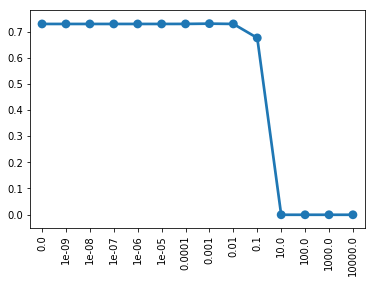

In [17]:
plt.figure()
sns.pointplot(y=score,x=c)
plt.xticks(rotation=90)
plt.show()

In [18]:
score

[-0.0007845484641346712,
 -0.0007845484641346712,
 -0.0007845484641346712,
 -0.0007845484641346712,
 0.7293777275516613,
 0.6759073503245081,
 0.7294743602470993,
 0.7305768167350697,
 0.7295268813201856,
 0.7293930872516072,
 0.7293793668037452,
 0.7293778839587912,
 0.7293777426403284,
 0.7293777291555499]

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.score(x_test,y_test))

0.7293777275516614


In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
print(rf_model.score(x_test,y_test))

0.9061869479429157


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
from sklearn.tree import DecisionTreeRegressor
rf_model = DecisionTreeRegressor()
rf_model.fit(x_train,y_train)
print(rf_model.score(x_test,y_test))

0.9138715933712245


In [23]:
from sklearn.preprocessing import PolynomialFeatures
for i in [1,2,3,4,5,6]:
    polynomial_features=PolynomialFeatures(degree=i)
    x_poly = polynomial_features.fit(x_train)
    x_poly_test=polynomial_features.transform(x_test)
    regressor=LinearRegression()
    regressor.fit(x_train,y_train)
    print(str(i)+' '+str(regressor.score(x_test,y_test)))

1 0.7293777275516614
2 0.7293777275516614
3 0.7293777275516614
4 0.7293777275516614
5 0.7293777275516614
6 0.7293777275516614


In [24]:
from sklearn.ensemble import AdaBoostRegressor
regressor=AdaBoostRegressor(DecisionTreeRegressor())
regressor.fit(x_train,y_train)
print(regressor.score(x_test,y_test))

0.9646255649113236


In [25]:
X=train[['GRE Score','TOEFL Score','University Rating','SOP','LOR ']]
Y=train['Chance of Admit ']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

In [27]:
from sklearn.ensemble import AdaBoostRegressor
regressor=AdaBoostRegressor(DecisionTreeRegressor())
regressor.fit(x_train,y_train)
print(regressor.score(x_test,y_test))

0.9521414207258214


In [28]:
from sklearn.preprocessing import PolynomialFeatures
for i in [1,2,3,4,5,6]:
    polynomial_features=PolynomialFeatures(degree=i)
    x_poly = polynomial_features.fit(x_train)
    x_poly_test=polynomial_features.transform(x_test)
    regressor=LinearRegression()
    regressor.fit(x_train,y_train)
    print(str(i)+' '+str(regressor.score(x_test,y_test)))

1 0.7231795839958536
2 0.7231795839958536
3 0.7231795839958536
4 0.7231795839958536
5 0.7231795839958536
6 0.7231795839958536


In [29]:
from sklearn.tree import DecisionTreeRegressor
rf_model = DecisionTreeRegressor()
rf_model.fit(x_train,y_train)
print(rf_model.score(x_test,y_test))

0.9184103982185191


In [30]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.score(x_test,y_test))

0.7231795839958536


In [31]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
print(rf_model.score(x_test,y_test))

0.9113471238559558


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
from xgboost import XGBRegressor
regressor=XGBRegressor(max_depth = 6)
regressor.fit(x_train,y_train)
print(regressor.score(x_test,y_test))

0.919989152250675
